#STB Q1

## Question 1

Some of the respondents have been tagged as belonging to group 1 – 6. However, due to a data calculation issue, some of the respondents have had their groups (pov6) missing.

Build a model that will classify these respondents back into one of the 6 groups.

- Please explain the choice of metric / evaluation criterion used
- What are the assumptions you made when building this model?
- What were the approaches you considered? Please explain the reason for the technique / approach used as well as the pros and cons.
- Please explain under what conditions will the model you choose be not appropriate
- How confident are you of the model’s robustness and how would you explain the model’s performance?
- Why is your model performing well / not well?
- Was any feature engineering required? If yes, what were they. If no, why?

Please include your supporting scripts/output from R or an alternative tool of your choice. 


### Setting up enviroment 

In [1]:
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget -q https://downloads.apache.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
# !tar xf spark-2.4.7-bin-hadoop2.7.tgz 
# !pip install -q findspark

# !pwd
# !ls -lah
# !echo 'JVM---'
!ls /usr/lib/jvm/java-1.8.0-openjdk-amd64/
# !echo 'Spark---'
!ls /content/spark-2.4.7-bin-hadoop2.7

ASSEMBLY_EXCEPTION  docs     jre  man	   THIRD_PARTY_README
bin		    include  lib  src.zip
bin   data	jars	    LICENSE   NOTICE  R		 RELEASE  yarn
conf  examples	kubernetes  licenses  python  README.md  sbin


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

**Upload Data ...**

In [3]:
from google.colab import files
files.upload() # manually upload the excel file 
!ls

{}

In [5]:
# Spark DF ! not panda
df_spend = spark.read.csv("spenddata.csv", header=True, inferSchema="true")
df_spend.show()
df_spend.dtypes

df_test = spark.read.csv("testdata.csv", header=True, inferSchema="true")
df_test.show()
df_test.dtypes


+---+-----+----+----+---+---+---+---+----+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+----+----+----+-----+----+----+----+-------+----+----+-----+----+------+----+----+----+----+------+-----+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+------+----+-----+----+-----+-----+-----+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-------------+----+-----+-----+-----+------+------+------+------+------+------+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----

[('_c0', 'int'),
 ('month', 'int'),
 ('var8', 'string'),
 ('var6', 'string'),
 ('a.1', 'int'),
 ('a.2', 'int'),
 ('a.3', 'int'),
 ('a.4', 'int'),
 ('var5', 'int'),
 ('b.5', 'int'),
 ('b.6', 'string'),
 ('b.7', 'int'),
 ('b.8', 'string'),
 ('b.9', 'int'),
 ('b.10', 'string'),
 ('b.11', 'string'),
 ('b.12', 'int'),
 ('b.13', 'string'),
 ('b.14', 'string'),
 ('b.15', 'int'),
 ('b.16', 'int'),
 ('b.17', 'double'),
 ('b.18', 'double'),
 ('b.19', 'int'),
 ('b.20', 'string'),
 ('b.21', 'string'),
 ('b.22', 'int'),
 ('pov6', 'string'),
 ('b.23', 'int'),
 ('b.24', 'int'),
 ('b.25', 'int'),
 ('b.26', 'int'),
 ('b.27', 'int'),
 ('b.28', 'int'),
 ('c.29', 'int'),
 ('c.30', 'int'),
 ('var7', 'int'),
 ('c.31', 'string'),
 ('c.32', 'int'),
 ('c.33', 'int'),
 ('c.34', 'int'),
 ('c.35', 'int'),
 ('c.36', 'string'),
 ('c.37', 'string'),
 ('c.38', 'int'),
 ('c.39', 'string'),
 ('c.40', 'double'),
 ('c.41', 'double'),
 ('c.42', 'int'),
 ('c.43', 'double'),
 ('c.44', 'int'),
 ('c.45', 'double'),
 ('c.46', 

Index(['pov6', 'e.96', 'e.97', 'e.95', 'e.100', 'e.99', 'e.98', 'b.22',
       'b.192', 'c.217', 'var7', 'c.221', 'f.108', 'f.121', 'c.255', 'b.5',
       'b.193', 'c.69', 'c.159', 't7.173', 'c.218', 'c.165', 't7.178', 'c.259',
       'b.12', 'c.30', 'c.76', 'c.75'],
      dtype='object')


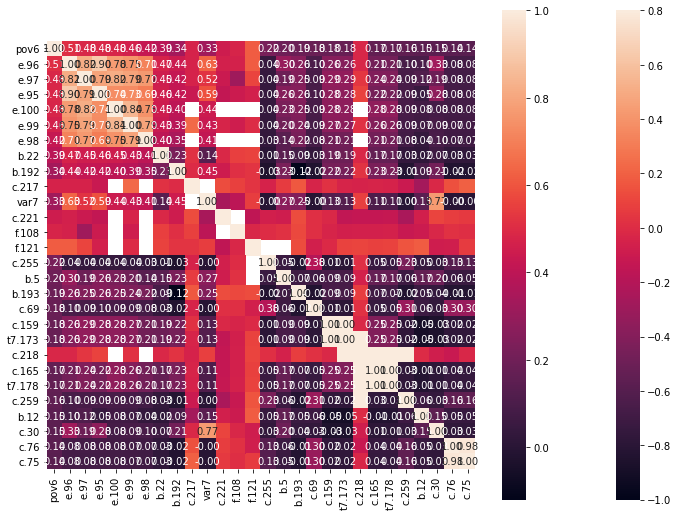

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df1 = pd.read_csv('spenddata.csv')
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

k = 28 # Number of variables for heatmap
cols = corrmat.nlargest(k, 'pov6')['pov6'].index
print(cols) # Largest related to SalePrice

cm = np.corrcoef(df1[cols].values.T)
# print(cm)

sns.heatmap(
  cm, 
  annot=True, 
  yticklabels=cols.values, 
  xticklabels=cols.values, 
  annot_kws={'size': 10}, #Text Size
  fmt='.2f', # Decimal Point
)
plt.show()

In [84]:
# df_train = df1[cols]
# # df_train.head()
# X = df_train.iloc[:,1:]
# print(X.head())
# y = df_train.iloc[:,0]
# print(y.head())

   e.96  e.97  e.95  e.100  e.99  e.98  ...  t7.178  c.259  b.12  c.30  c.76  c.75
0     3     2     2      2     2     2  ...       1      0     2     1   0.0   0.0
1     2     2     2      2     3     3  ...       2      0     2     2   0.0   0.0
2     4     4     4      4     4     4  ...       2      0     1     2   0.0   0.0
3     2     1     2      2     2     3  ...       1      0     2     2  30.0   0.0
4     2     1     2      1     1     1  ...       2      0     1     2   0.0   0.0

[5 rows x 27 columns]
0    1
1    1
2    1
3    1
4    2
Name: pov6, dtype: int64


In [85]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# seed = 7
# test_size = 0.33
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# model = XGBClassifier()
# model.fit(X_train, y_train)
# # make predictions for test data
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.82%


**Guess how many features is optimal result based on correlation**

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


df1 = pd.read_csv('spenddata.csv')
print(len(df1.columns))
best_acc = 0
best_feature = 0
for i in range(2, 300):
  k = i # Number of variables for heatmap
  cols = corrmat.nlargest(k, 'pov6')['pov6'].index
  # print(cols) # Largest related to SalePrice

  df_train = df1[cols]
  X = df_train.iloc[:,1:]
  y = df_train.iloc[:,0]

  seed = 7
  test_size = 0.33
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

  model = XGBClassifier()
  model.fit(X_train, y_train)
  # make predictions for test data
  y_pred = model.predict(X_test)
  predictions = [round(value) for value in y_pred]
  # evaluate predictions
  accuracy = accuracy_score(y_test, predictions)
  # print(k, "corr feature(s) used. Accuracy: %.2f%%" % (accuracy * 100.0))
  if (best_acc < (accuracy * 100.0)):
    print(k, "corr feature(s) used. Accuracy: %.2f%%" % (accuracy * 100.0))
    best_acc = (accuracy * 100.0)
    best_feature = k
  
print("Best Corr Feature to used:", best_feature)

301
2 corr feature(s) used. Accuracy: 87.55%
8 corr feature(s) used. Accuracy: 93.75%
9 corr feature(s) used. Accuracy: 94.21%
10 corr feature(s) used. Accuracy: 94.23%
11 corr feature(s) used. Accuracy: 94.63%
12 corr feature(s) used. Accuracy: 94.68%
13 corr feature(s) used. Accuracy: 94.71%
19 corr feature(s) used. Accuracy: 94.72%
21 corr feature(s) used. Accuracy: 94.76%
22 corr feature(s) used. Accuracy: 94.82%
37 corr feature(s) used. Accuracy: 94.94%
43 corr feature(s) used. Accuracy: 94.96%
47 corr feature(s) used. Accuracy: 95.80%
52 corr feature(s) used. Accuracy: 95.85%
55 corr feature(s) used. Accuracy: 95.94%
63 corr feature(s) used. Accuracy: 96.08%
66 corr feature(s) used. Accuracy: 96.11%
216 corr feature(s) used. Accuracy: 96.13%
242 corr feature(s) used. Accuracy: 96.29%
258 corr feature(s) used. Accuracy: 96.32%
267 corr feature(s) used. Accuracy: 96.39%
268 corr feature(s) used. Accuracy: 96.42%
276 corr feature(s) used. Accuracy: 96.46%
277 corr feature(s) used. A